In [1]:
import pandas as pd
import numpy as np
import os
import cv as cv
import matplotlib.pyplot as plt

Task 1

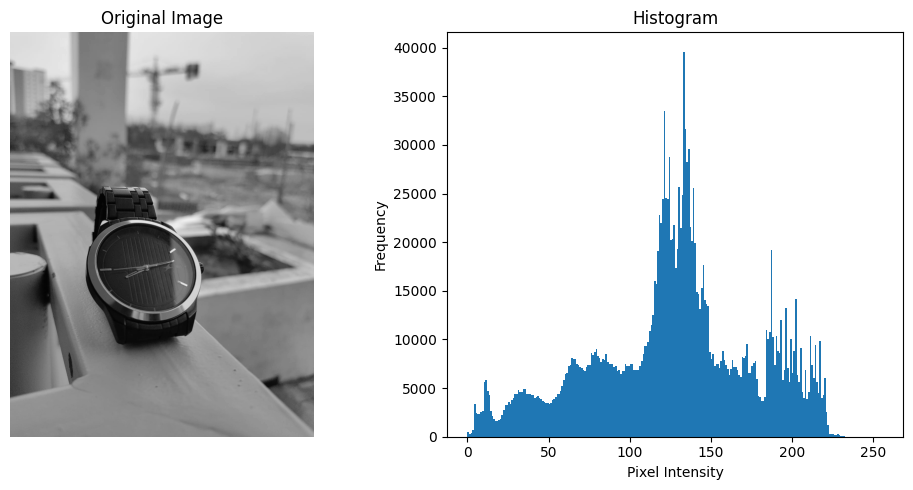

In [2]:
image_path = 'watch.jpg'
image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.hist(image_gray.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


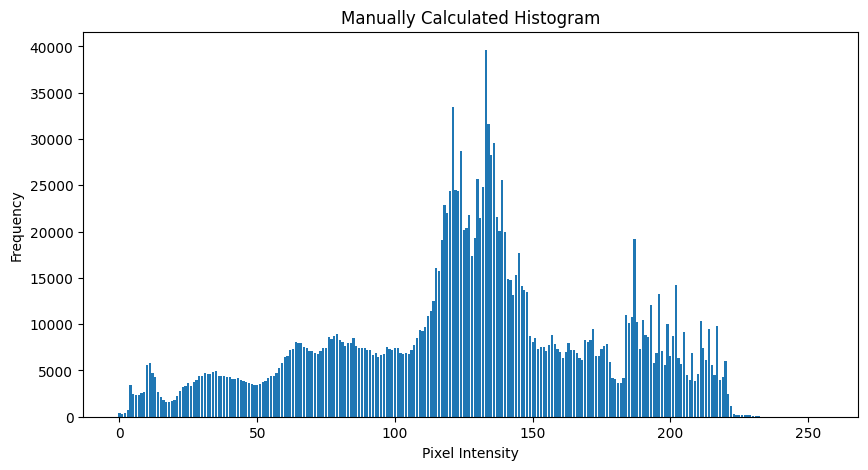

In [3]:
histogram = np.zeros(256, dtype=int)
for pixel_value in image_gray.ravel():
  histogram[pixel_value] += 1

plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram)
plt.title('Manually Calculated Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

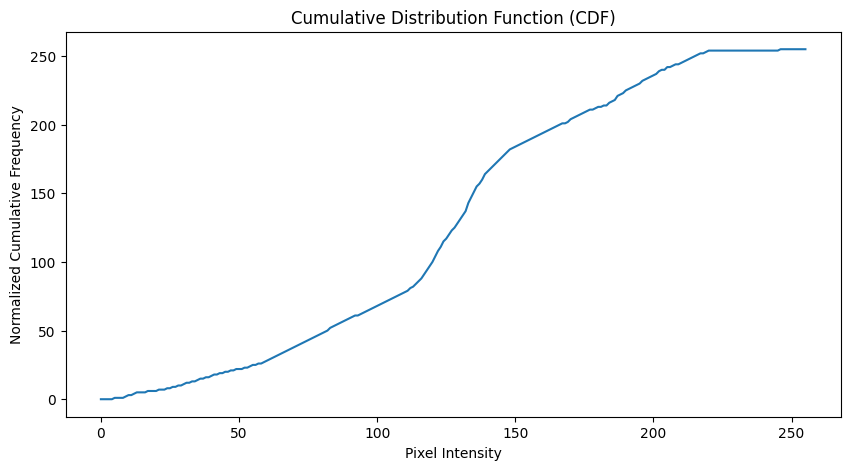

In [4]:
cdf = histogram.cumsum()
cdf_normalized = cdf * 255 / cdf[-1] 
cdf_normalized = cdf_normalized.astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.plot(cdf_normalized)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Cumulative Frequency')
plt.show()

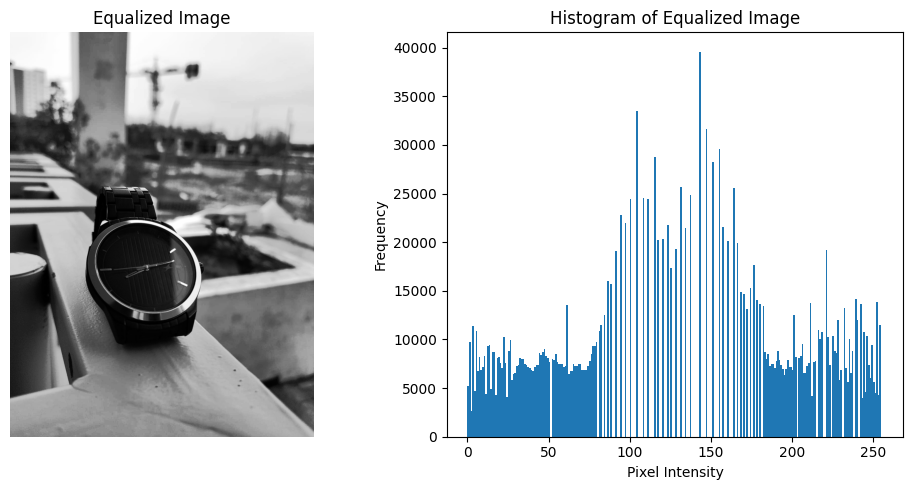

In [5]:
equalized_image = cdf_normalized[image_gray]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


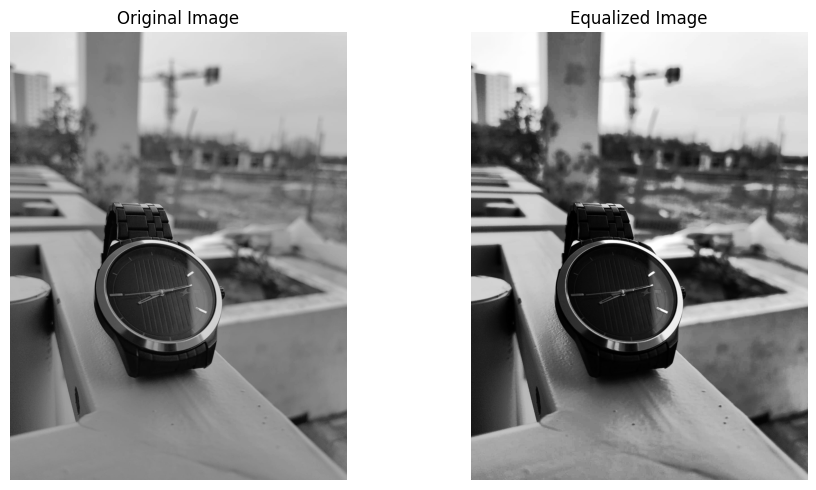

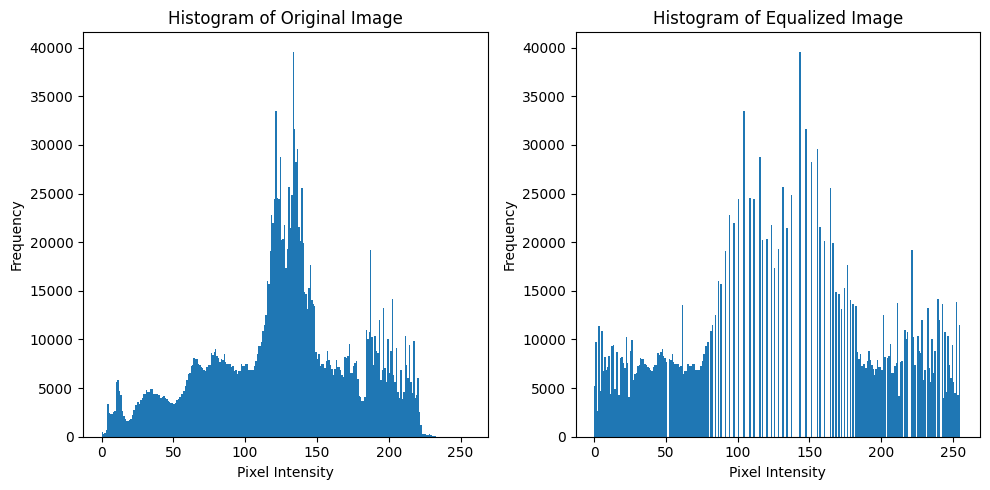

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Histogram of Original Image')
plt.hist(image_gray.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Task 2

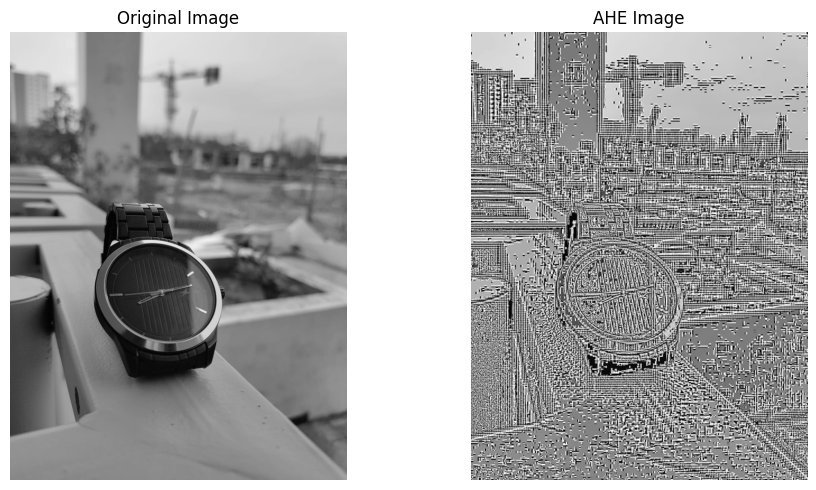

In [8]:
image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

def adaptive_histogram_equalization(img, tile_size=(8, 8)):
    height, width = img.shape
    result = np.zeros_like(img)

    for i in range(0, height, tile_size[0]):
        for j in range(0, width, tile_size[1]):
            tile = img[i:i+tile_size[0], j:j+tile_size[1]]
            tile_equalized = cv.equalizeHist(tile)
            result[i:i+tile_size[0], j:j+tile_size[1]] = tile_equalized

    return result
ahe_image = adaptive_histogram_equalization(image_gray)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('AHE Image')
plt.imshow(ahe_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

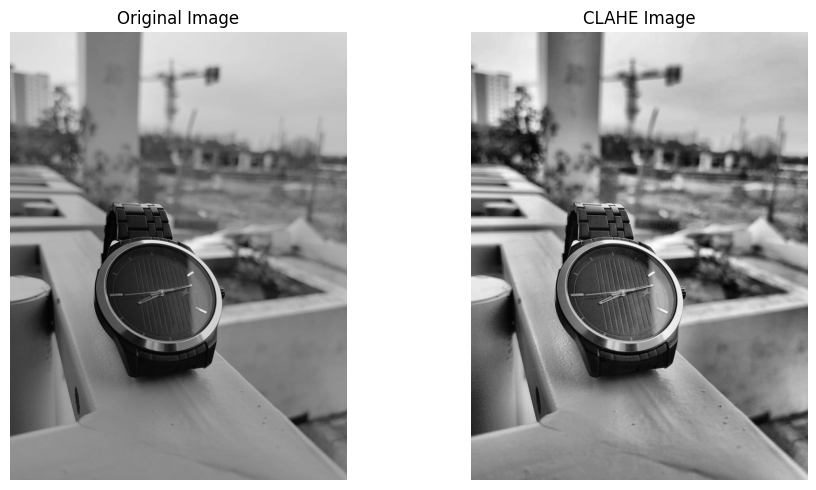

In [9]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(image_gray)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE Image')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


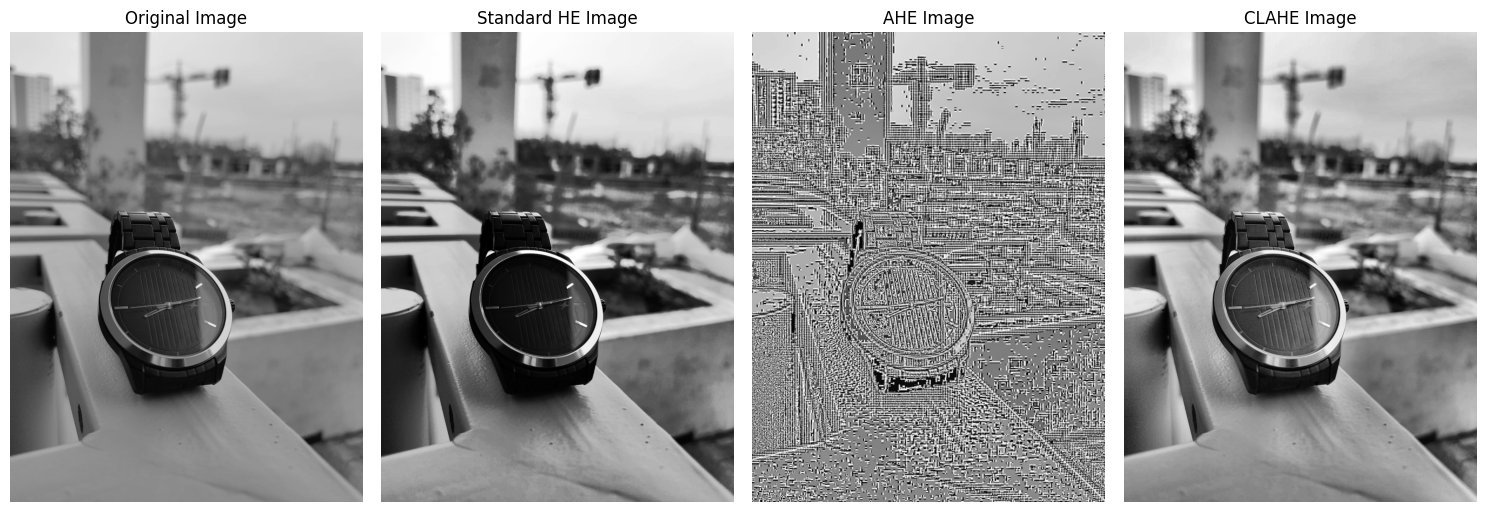

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Standard HE Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('AHE Image')
plt.imshow(ahe_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('CLAHE Image')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 3

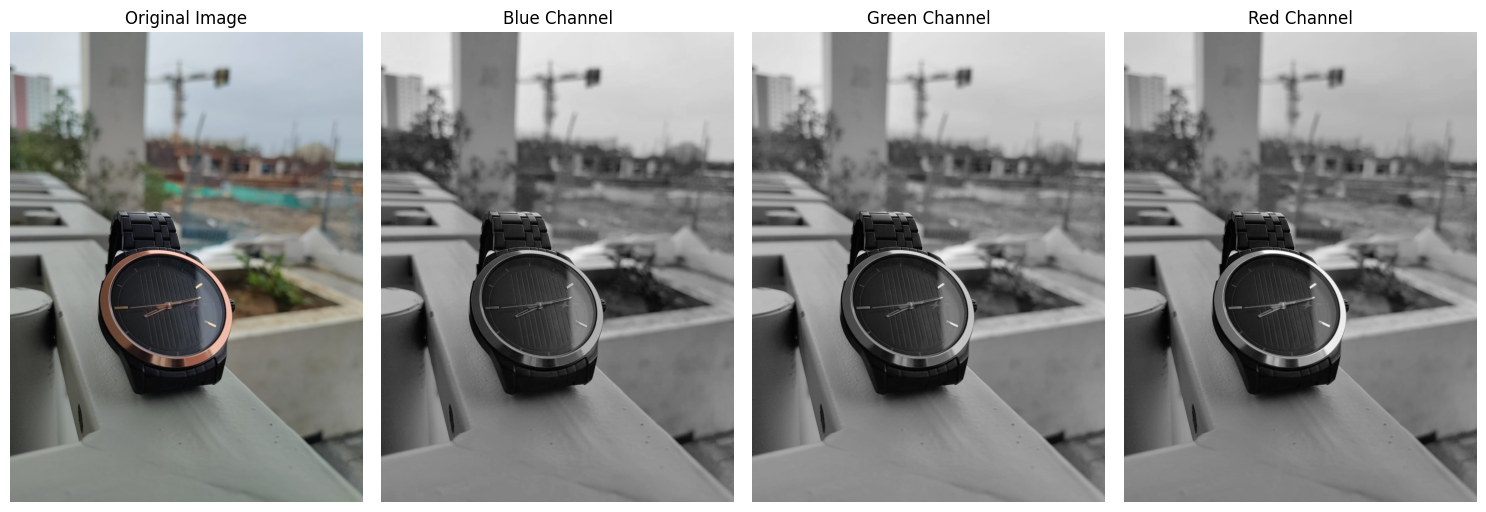

In [11]:
color_image = cv.imread(image_path)
B, G, R = cv.split(color_image)
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(color_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Blue Channel')
plt.imshow(B, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Green Channel')
plt.imshow(G, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Red Channel')
plt.imshow(R, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [12]:
equalized_B = cv.equalizeHist(B)
equalized_G = cv.equalizeHist(G)
equalized_R = cv.equalizeHist(R)

In [14]:
equalized_color_image = cv.merge([equalized_B, equalized_G, equalized_R])

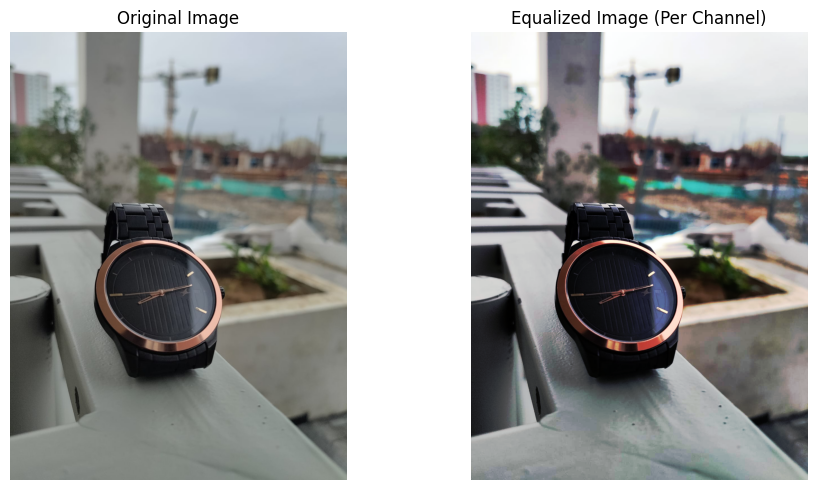

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(color_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image (Per Channel)')
plt.imshow(cv.cvtColor(equalized_color_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

Task 4

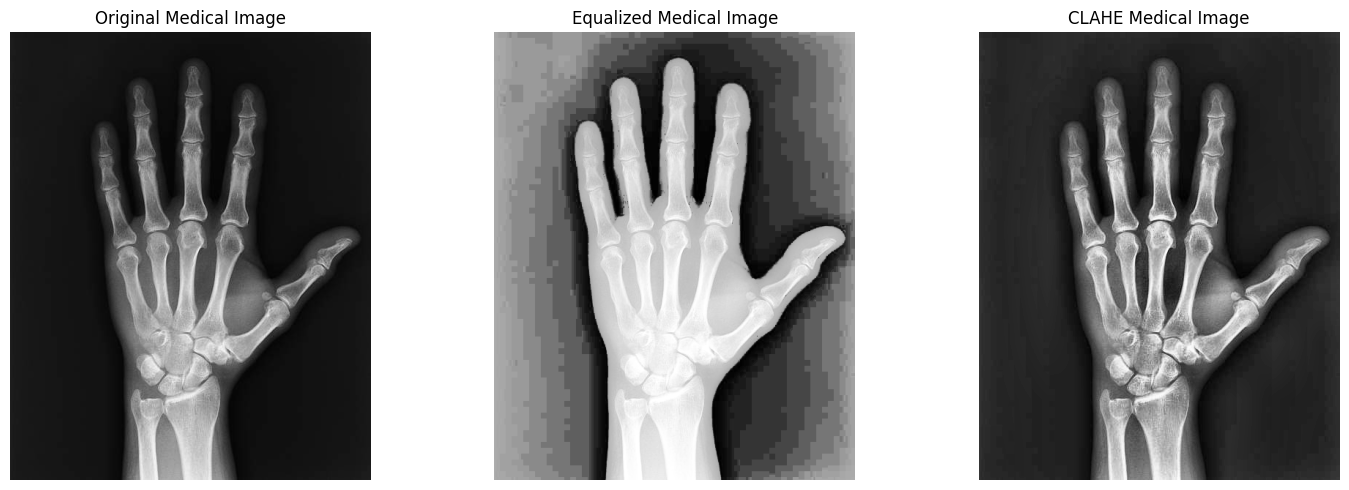

In [17]:
medical_image_path = 'xray.jpg'
medical_image_gray = cv.imread(medical_image_path, cv.IMREAD_GRAYSCALE)

equalized_medical_image = cv.equalizeHist(medical_image_gray)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_medical_image = clahe.apply(medical_image_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Medical Image')
plt.imshow(medical_image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Equalized Medical Image')
plt.imshow(equalized_medical_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('CLAHE Medical Image')
plt.imshow(clahe_medical_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


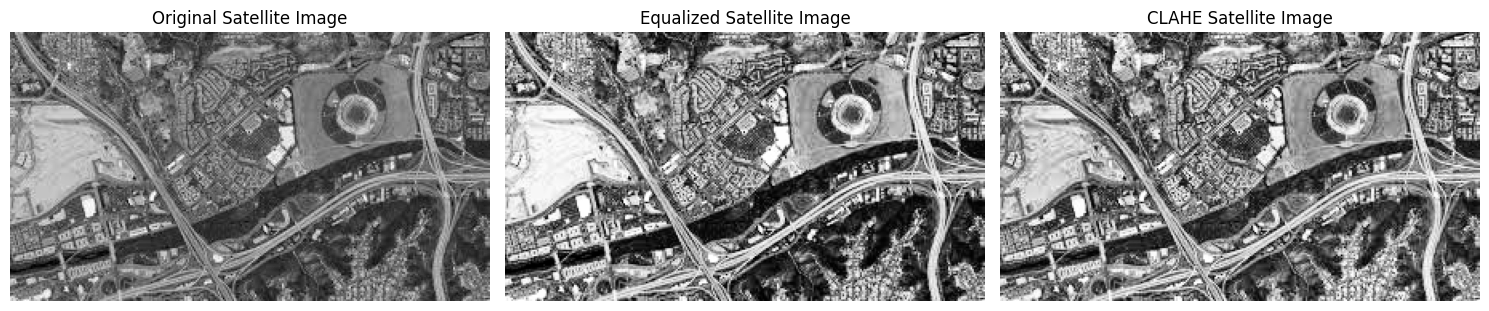

In [18]:
satellite_image_path = 'satelite.jpeg'
satellite_image_gray = cv.imread(satellite_image_path, cv.IMREAD_GRAYSCALE)

equalized_satellite_image = cv.equalizeHist(satellite_image_gray)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_satellite_image = clahe.apply(satellite_image_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Satellite Image')
plt.imshow(satellite_image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Equalized Satellite Image')
plt.imshow(equalized_satellite_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('CLAHE Satellite Image')
plt.imshow(clahe_satellite_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


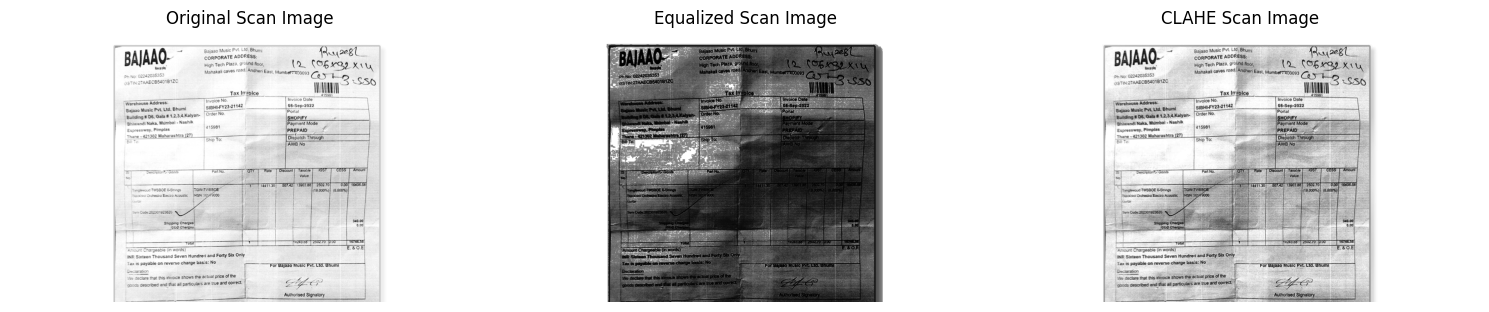

In [20]:
scan_image_path = 'scan.jpeg'
scan_image_gray = cv.imread(scan_image_path, cv.IMREAD_GRAYSCALE)

equalized_scan_image = cv.equalizeHist(scan_image_gray)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_scan_image = clahe.apply(scan_image_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Scan Image')
plt.imshow(scan_image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Equalized Scan Image')
plt.imshow(equalized_scan_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('CLAHE Scan Image')
plt.imshow(clahe_scan_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

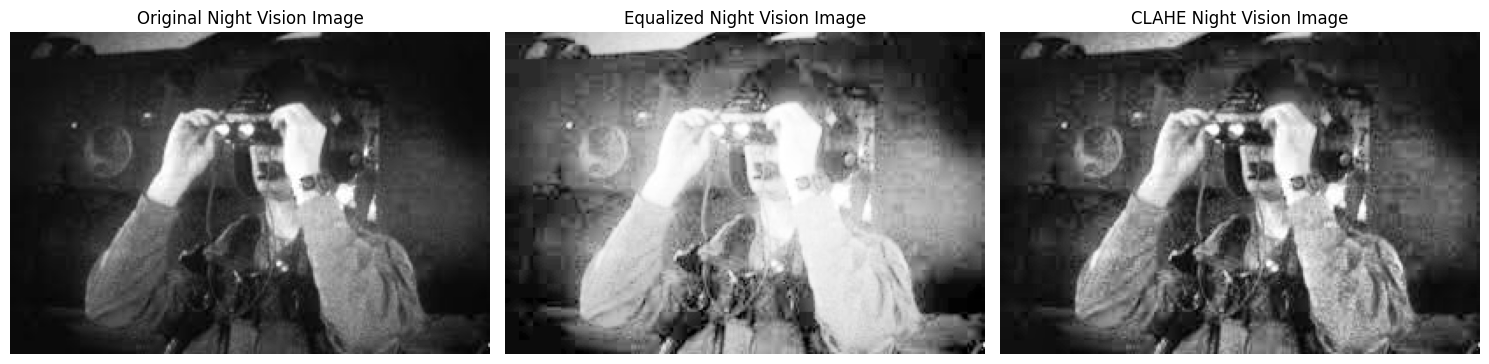

In [22]:
night_vision_image_path = 'night.jpg'
night_vision_image_gray = cv.imread(night_vision_image_path, cv.IMREAD_GRAYSCALE)

equalized_night_vision_image = cv.equalizeHist(night_vision_image_gray)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_night_vision_image = clahe.apply(night_vision_image_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Night Vision Image')
plt.imshow(night_vision_image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Equalized Night Vision Image')
plt.imshow(equalized_night_vision_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('CLAHE Night Vision Image')
plt.imshow(clahe_night_vision_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 5

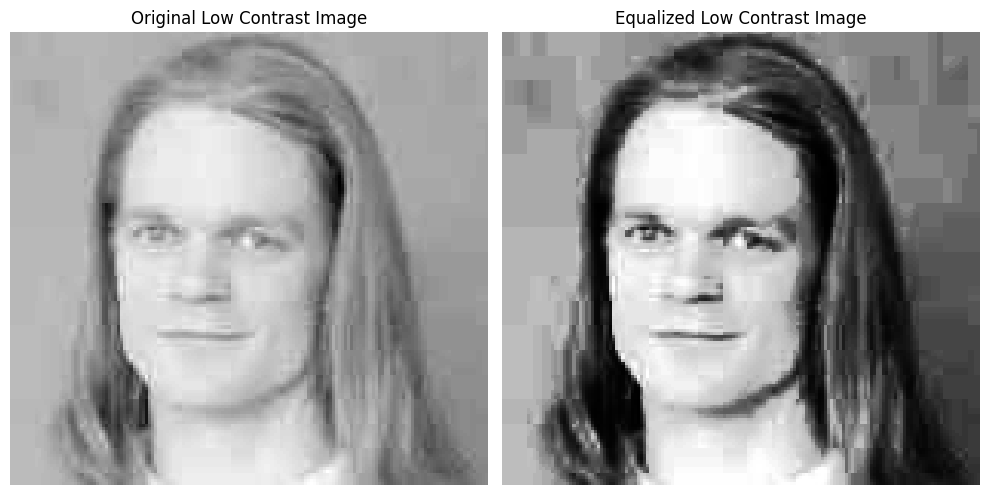

In [23]:
low_contrast_image_path = 'lowcontrast.jpeg'
low_contrast_image_gray = cv.imread(low_contrast_image_path, cv.IMREAD_GRAYSCALE)

equalized_low_contrast_image = cv.equalizeHist(low_contrast_image_gray)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Low Contrast Image')
plt.imshow(low_contrast_image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Low Contrast Image')
plt.imshow(equalized_low_contrast_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 6

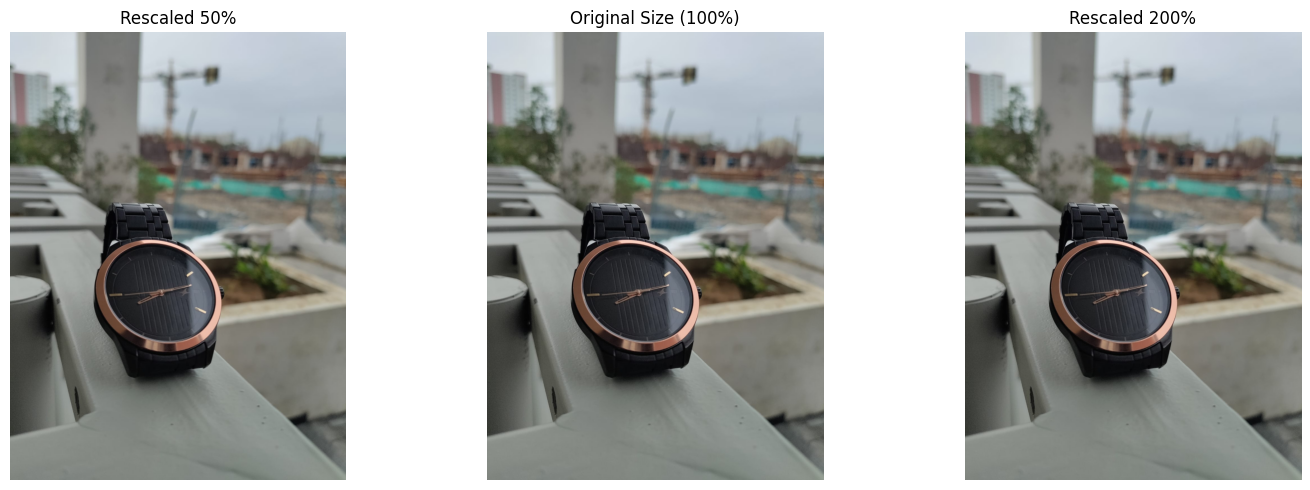

In [25]:
image_path = 'watch.jpg'
image = cv.imread(image_path)

scale_percent_50 = 50
width_50 = int(image.shape[1] * scale_percent_50 / 100)
height_50 = int(image.shape[0] * scale_percent_50 / 100)
dim_50 = (width_50, height_50)
resized_50 = cv.resize(image, dim_50, interpolation=cv.INTER_AREA)

scale_percent_100 = 100
width_100 = int(image.shape[1] * scale_percent_100 / 100)
height_100 = int(image.shape[0] * scale_percent_100 / 100)
dim_100 = (width_100, height_100)
resized_100 = cv.resize(image, dim_100, interpolation=cv.INTER_AREA)

scale_percent_200 = 200
width_200 = int(image.shape[1] * scale_percent_200 / 100)
height_200 = int(image.shape[0] * scale_percent_200 / 100)
dim_200 = (width_200, height_200)
resized_200 = cv.resize(image, dim_200, interpolation=cv.INTER_AREA)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Rescaled 50%')
plt.imshow(cv.cvtColor(resized_50, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Original Size (100%)')
plt.imshow(cv.cvtColor(resized_100, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Rescaled 200%')
plt.imshow(cv.cvtColor(resized_200, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


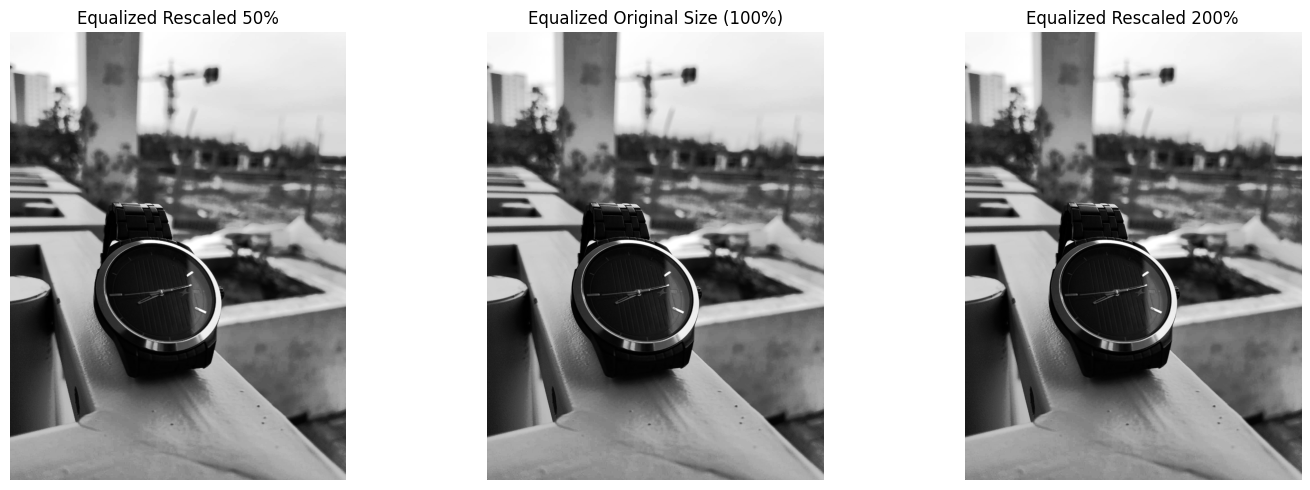

In [27]:

gray_resized_50 = cv.cvtColor(resized_50, cv.COLOR_BGR2GRAY)
equalized_resized_50 = cv.equalizeHist(gray_resized_50)

gray_resized_100 = cv.cvtColor(resized_100, cv.COLOR_BGR2GRAY)
equalized_resized_100 = cv.equalizeHist(gray_resized_100)

gray_resized_200 = cv.cvtColor(resized_200, cv.COLOR_BGR2GRAY)
equalized_resized_200 = cv.equalizeHist(gray_resized_200)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Equalized Rescaled 50%')
plt.imshow(equalized_resized_50, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Equalized Original Size (100%)')
plt.imshow(equalized_resized_100, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Equalized Rescaled 200%')
plt.imshow(equalized_resized_200, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


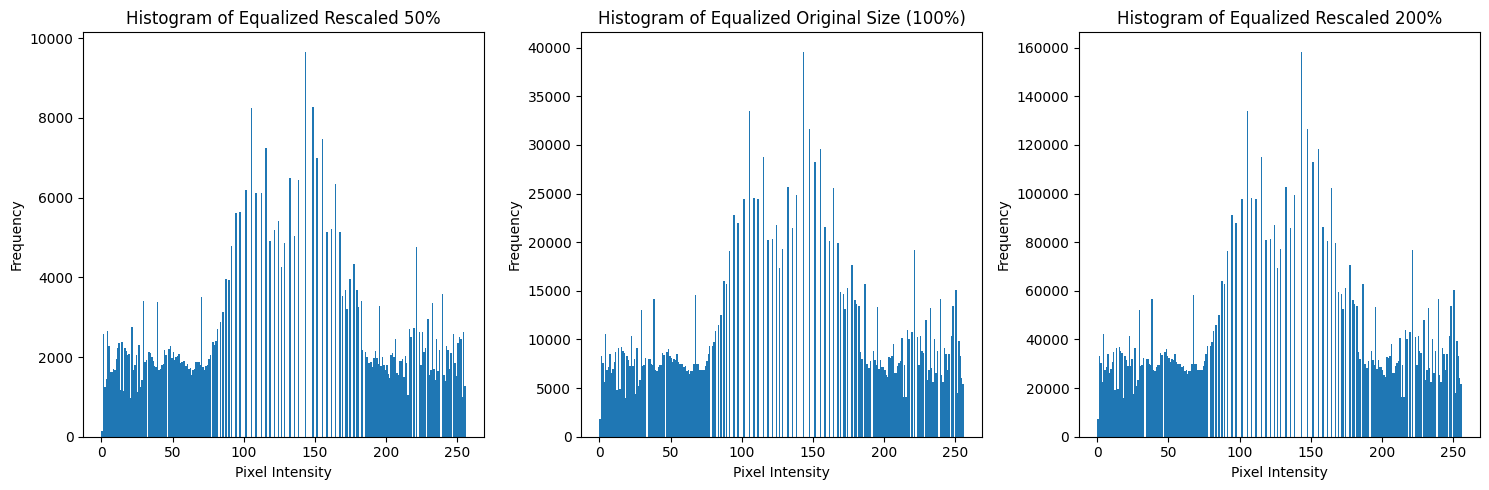

In [28]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Histogram of Equalized Rescaled 50%')
plt.hist(equalized_resized_50.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.title('Histogram of Equalized Original Size (100%)')
plt.hist(equalized_resized_100.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.title('Histogram of Equalized Rescaled 200%')
plt.hist(equalized_resized_200.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Task 7

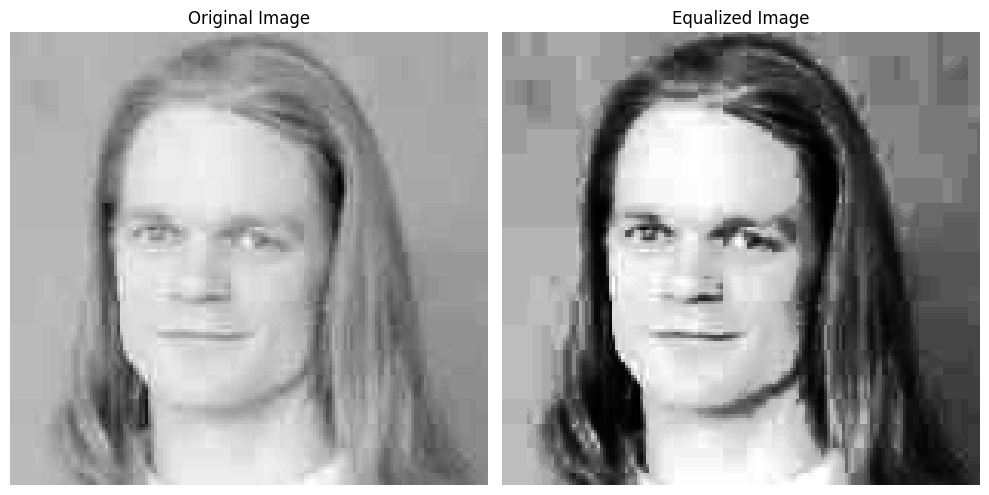

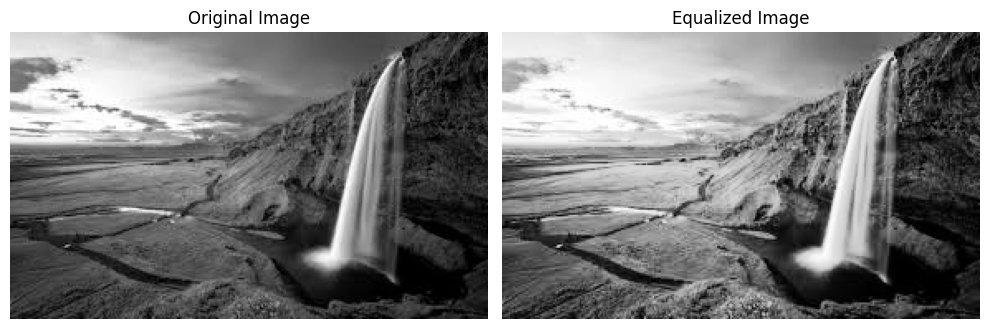

In [30]:
image_paths = ['lowcontrast.jpeg', 'highcontrast.jpeg']

for image_path in image_paths:
    image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    equalized_image = cv.equalizeHist(image_gray)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Equalized Image')
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
